In [2]:
from pynq import Overlay
from pynq import MMIO
import numpy as np
import struct
import binascii
import cmath
import random
import matplotlib.pyplot as plt

NUM_SAMPLES = 100

In [3]:
ol=Overlay('./cordiccart2pol.bit') #加载比特文件
#ol=Overlay('./design_1.bit')

In [4]:
cordic_ip=MMIO(0x40010000,0xffff) #Change base address as required
control=MMIO(0x40000000,0xffff)
#cordic_ip=ol.cordiccart2pol_0

In [5]:
x=random.uniform(-1,1)
y=random.uniform(-1,1)
print(cmath.polar(complex(x,y)))

(0.6690455379559561, -0.15411756026118806)


In [6]:
x=(struct.unpack('<I', struct.pack('<f', x))[0])
y=(struct.unpack('<I', struct.pack('<f', y))[0])
print(x,y)

1059667679 3184678516


In [7]:
cordic_ip.write(0x10,x)
cordic_ip.write(0x18,y)

cordic_ip.write(0x00,1)
cordic_ip.write(0x00,0)
control.write(0x00,1)
control.write(0x00,0)

r=hex(cordic_ip.read(0x20))                         
r=r[2:]
theta=hex(cordic_ip.read(0x28)) 
theta=theta[2:]
print(r,theta)

3f2b4692 be1dcf36


In [8]:
if r!=0:
        r=(struct.unpack('>f', binascii.unhexlify(r))[0])
if theta!=0:
        theta=(struct.unpack('>f', binascii.unhexlify(theta))[0])

print(r,theta)

0.6690455675125122 -0.15411075949668884


In [9]:
def cart2pol(x, y):
    x=(struct.unpack('<I', struct.pack('<f', x))[0])
    y=(struct.unpack('<I', struct.pack('<f', y))[0])
    
    
    cordic_ip.write(0x10,x)
    cordic_ip.write(0x18,y)
    
    cordic_ip.write(0x00,1)
    cordic_ip.write(0x00,0)
    control.write(0x00,1)
    control.write(0x00,0)

    r=hex(cordic_ip.read(0x20))                         
    r=r[2:]
    theta=hex(cordic_ip.read(0x28))                     
    theta=theta[2:]
    if r!=0:
        r=(struct.unpack('>f', binascii.unhexlify(r))[0])
    if theta!=0:
        theta=(struct.unpack('>f', binascii.unhexlify(theta))[0])
    
    
        
    return r, theta

In [10]:
x=random.uniform(-1,1)
y=random.uniform(-1,1)
print(cmath.polar(complex(x,y)))
r, theta = cart2pol(x, y)
print((r,theta))

(0.6428824633100297, 1.7732161612404067)
(0.6428824663162231, 1.7732276916503906)


# 测试

In [11]:
r_actual = np.zeros(NUM_SAMPLES)
theta_actual = np.zeros(NUM_SAMPLES)
r_predicted = np.zeros(NUM_SAMPLES)
theta_predicted = np.zeros(NUM_SAMPLES)

In [12]:
for i in range(NUM_SAMPLES):
    x = random.uniform(-1,1)
    y = random.uniform(-1,1)
     
    r_actual[i], theta_actual[i] = cmath.polar(complex(x,y))
    r_predicted[i], theta_predicted[i] = cart2pol(x, y)
    print(r_actual[i], r_predicted[i], theta_actual[i], theta_predicted[i])

0.686591581785 0.686591565609 1.04001936539 1.04004240036
1.30647219444 1.30647206306 0.791934412515 0.791942596436
0.677409961869 0.677410006523 -3.08288074103 -0.848832368851
0.752688480912 0.752688586712 -0.988378799617 -0.988354146481
0.889568460129 0.889568507671 -2.6454433995 -0.411406069994
0.917282099204 0.917282104492 -2.19626985723 -2.19626712799
0.92387305779 0.923873007298 -0.215031808584 -0.215003892779
0.615758475405 0.615758478642 0.61603656638 0.61600959301
0.765233774268 0.765233814716 0.304311412415 0.304336518049
1.35135356334 1.35135364532 2.32323417778 0.0892185494304
0.868906355348 0.868906438351 2.072969368 2.07294392586
1.02860617331 1.02860629559 0.414685742477 0.41470387578
1.19465314544 1.19465315342 2.49356522727 0.259536296129
0.810436075999 0.810436069965 -0.626106637051 -0.626080393791
0.584059330723 0.584059357643 2.83918916373 0.605188190937
0.807669960262 0.807669937611 -0.682695836273 -0.682700753212
0.334026818962 0.334026813507 1.71192369367 1.71190

In [13]:
r_diff=np.subtract(r_actual,r_predicted)
r_square=np.square(r_diff)
r_mse=r_square.mean()
r_rmse=np.sqrt(r_mse)

theta_diff=np.subtract(theta_actual,theta_predicted)
theta_square=np.square(theta_diff)
theta_mse=theta_square.mean()
theta_rmse=np.sqrt(theta_mse)

In [14]:
print("Radius RMSE: ", r_rmse, "Theta RMSE:", theta_rmse)    
if r_rmse<0.001 and theta_rmse<0.001:
    print("PASS")
else:
    print("FAIL")

Radius RMSE:  5.76593408978e-08 Theta RMSE: 1.2236250093
FAIL


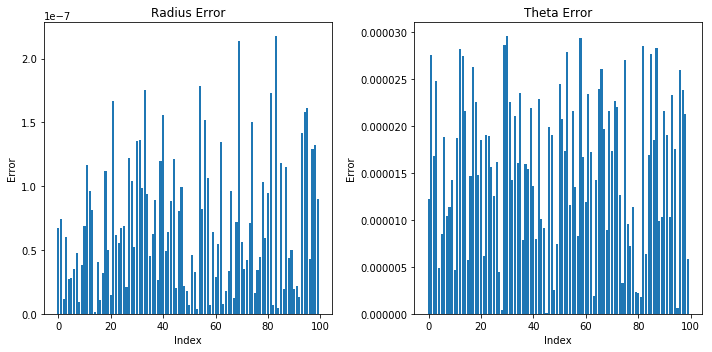

In [112]:
ind=np.arange(NUM_SAMPLES)
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.bar(ind,abs(r_diff))
plt.title("Radius Error")
plt.xlabel("Index")
plt.ylabel("Error")
#plt.xticks(ind)
plt.tight_layout()

plt.subplot(1,2,2)
plt.bar(ind,abs(theta_diff))
plt.title("Theta Error")
plt.xlabel("Index")
plt.ylabel("Error")
#plt.xticks(ind)
plt.tight_layout()